In [33]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import xarray as xr
import matplotlib.pyplot as plt

## 2. Fire perimeter data exploration
Explore the fire perimeter data and write a brief summary of the information you obtained from the preliminary exploration. Your summary should include, at least, the CRS of the data and whether this is projected or geographic.

In [8]:
fp = os.path.join('data/Palisades_perm_20250121/Palisades_Perimeter_20250121.shp')
pal_perm = gpd.read_file(fp)

fp = os.path.join('data/Eaton_perm_20250121/Eaton_Perimeter_20250121.shp')
eat_perm = gpd.read_file(fp)

In [9]:
pal_perm.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
eat_perm.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The Palisades and Eaton perimeter fires are both project with a CRS of EPSG:3857.

## 3. NetCDF data import and exploration
n your notebook:

a. Import the Landsat data using xr.open_dataset().

b. Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.



In [11]:
fire = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [12]:
fire

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

The `fire` dataset is a (2742,1418) 

## 4. Restoring geospatial information

Explore the data and write a brief summary of the information you obtained from the preliminary information. Your summary should include the a description of the data’s variables, dimensions, and coordinates.

The fire variables are `red`, `green`, `blue`, `nir08`, `swir22`, `spatial_ref`. The coordinates are latitude and longitude as x and y, with time as a third coordinate. The dimensions are (5,5).

In [13]:
fire.head()

<xarray.Dataset> Size: 596B
Dimensions:      (y: 5, x: 5)
Coordinates:
  * y            (y) float64 40B 3.799e+06 3.799e+06 ... 3.799e+06 3.799e+06
  * x            (x) float64 40B 3.344e+05 3.344e+05 ... 3.345e+05 3.345e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 100B ...
    green        (y, x) float32 100B ...
    blue         (y, x) float32 100B ...
    nir08        (y, x) float32 100B ...
    swir22       (y, x) float32 100B ...
    spatial_ref  int64 8B ...

In [14]:
print(fire.rio.crs)

None


The fire dataset is not a geospatial object.

In [15]:
fire_crs = fire.spatial_ref.crs_wkt

fire = fire.rio.write_crs(fire_crs)


print(fire.rio.crs)

EPSG:32611


In [17]:
print(f'The CRS of the fire data is {fire.rio.crs}')

The CRS of the fire data is EPSG:32611


## 5. True color image

a. Without creating any new variables:
- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
- convert it to a numpy.array using the to_array() method, and then
- use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

b. Adjust the scale used for plotting the bands to get a true color image. HINT: Check the robust parameter. The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting.

c. To resolve the other warning, identify which bands have nan values. HINT: There are many ways of doing so. One option is to use numpy.isnan().

d. Use the .fillna() mehtod for xarray.Datasets to substitute the any nan values in the Landsat data for zero.

e. Create a new true color image that gets plotted without warnings.

f. In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (e).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


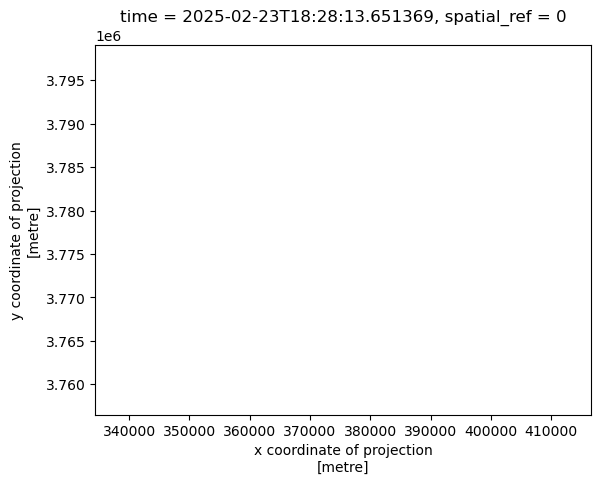

In [21]:
# a.
# Creating initial true color plot
fire[["red", "green", "blue"]].to_array().plot.imshow()

red False
green True
blue True
nir08 False
swir22 False


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


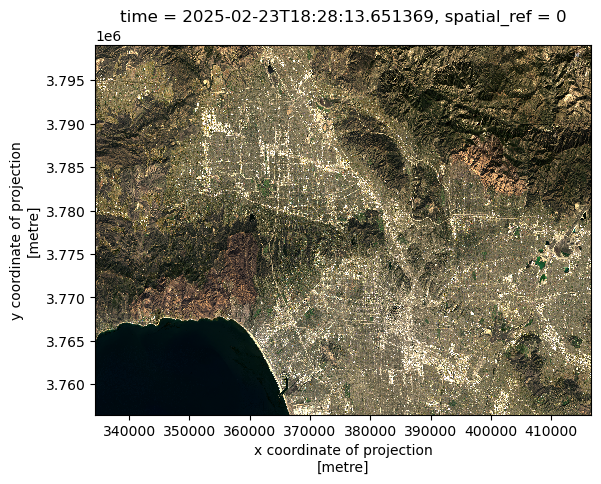

In [22]:
# b.
fire[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

In [23]:
# c.
# Create a for loop to determine which bands have NA's
for band in fire.data_vars:
    print(band, fire[band].isnull().any().item())

red False
green True
blue True
nir08 False
swir22 False


In [24]:
# d.
# Replace NA's
fire = fire.fillna(0)

In [28]:
# Test that there are no more NA's
assert (fire[band].isnull().any().item() == False)

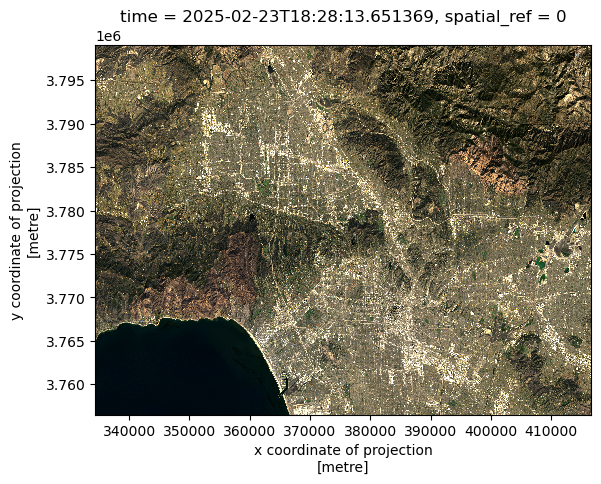

In [29]:
# e.
fire[["red", "green", "blue"]].to_array().plot.imshow(robust = True)

f.
The inital plot did not produce a map. A plot was produced in part e that displays the Los Angeles area where the Eaton and Palisade fires took place.

## 6. False color image

Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).


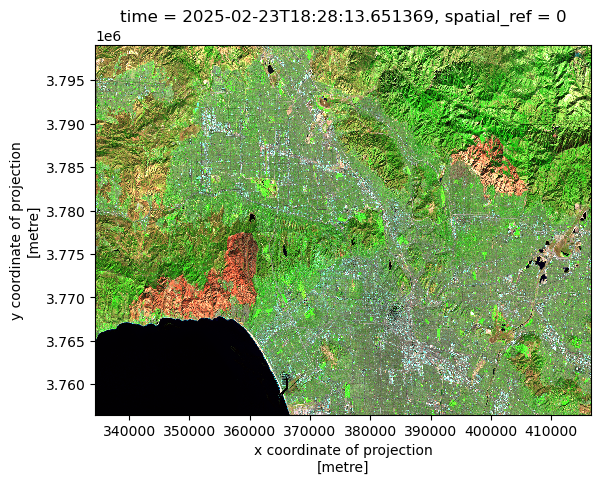

In [31]:
fire[[ "swir22", "nir08", "red"]].to_array().plot.imshow(robust = True)

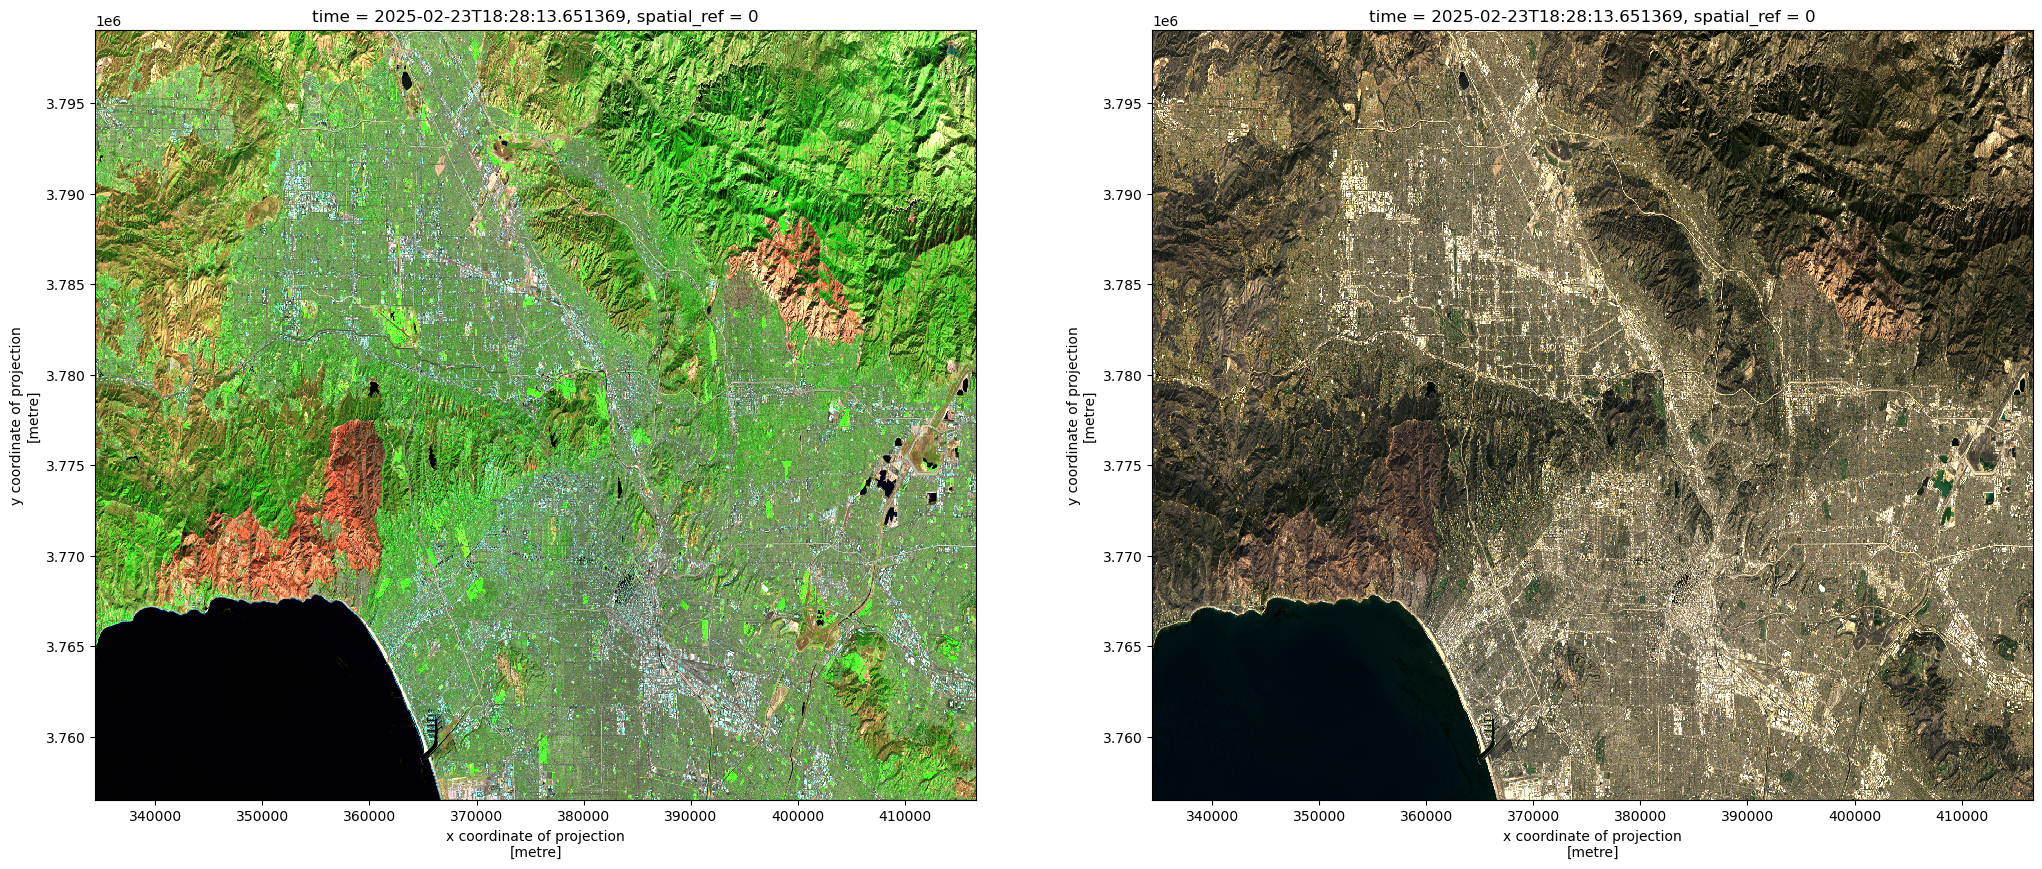

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
fire[[ "swir22", "nir08", "red"]].to_array().plot.imshow(robust = True, ax=ax1)
fire[["red", "green", "blue"]].to_array().plot.imshow(robust = True, ax=ax2)

## 7. Map
a. Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

b. Write a figure description for the map including a brief explanation of how false color imagery is being used.